<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#importing data from excelsheet
consumer_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(consumer_sales)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
consumer=data.groupby('Segment')
consumer_mod=consumer.get_group('Consumer')
consumer_mod.shape

(5191, 21)

In [17]:
consumer_mod.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [18]:
consumer_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5191 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         5191 non-null   int64         
 1   Order ID       5191 non-null   object        
 2   Order Date     5191 non-null   datetime64[ns]
 3   Ship Date      5191 non-null   datetime64[ns]
 4   Ship Mode      5191 non-null   object        
 5   Customer ID    5191 non-null   object        
 6   Customer Name  5191 non-null   object        
 7   Segment        5191 non-null   object        
 8   Country        5191 non-null   object        
 9   City           5191 non-null   object        
 10  State          5191 non-null   object        
 11  Postal Code    5191 non-null   int64         
 12  Region         5191 non-null   object        
 13  Product ID     5191 non-null   object        
 14  Category       5191 non-null   object        
 15  Sub-Category   5191 non-nu

In [21]:
for i in consumer_mod.columns:
  print(i,':','\n',consumer_mod[i].unique())

Row ID : 
 [   1    2    4 ... 9992 9993 9994]
Order ID : 
 ['CA-2016-152156' 'US-2015-108966' 'CA-2014-115812' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914']
Order Date : 
 <DatetimeArray>
['2016-11-08 00:00:00', '2015-10-11 00:00:00', '2014-06-09 00:00:00',
 '2017-04-15 00:00:00', '2016-12-05 00:00:00', '2014-11-11 00:00:00',
 '2014-05-13 00:00:00', '2014-08-27 00:00:00', '2017-07-16 00:00:00',
 '2015-09-25 00:00:00',
 ...
 '2015-05-09 00:00:00', '2014-05-21 00:00:00', '2016-10-10 00:00:00',
 '2014-11-06 00:00:00', '2015-12-29 00:00:00', '2016-08-21 00:00:00',
 '2014-12-28 00:00:00', '2015-09-06 00:00:00', '2015-05-17 00:00:00',
 '2014-01-21 00:00:00']
Length: 1044, dtype: datetime64[ns]
Ship Date : 
 <DatetimeArray>
['2016-11-11 00:00:00', '2015-10-18 00:00:00', '2014-06-14 00:00:00',
 '2017-04-20 00:00:00', '2016-12-10 00:00:00', '2014-11-18 00:00:00',
 '2014-05-15 00:00:00', '2014-09-01 00:00:00', '2017-07-18 00:00:00',
 '2015-09-30 00:00:00',
 ...
 '2015-05-13 00:00:00'

In [22]:
consumer_mod.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,5191.000000,5191,5191,5191,5191,5191,5191,5191,5191,5191,...,5191.000000,5191,5191,5191,5191,5191,5191.000000,5191.000000,5191.000000,5191.000000
unique,NaN,2586,NaN,NaN,4,409,409,1,1,422,...,NaN,4,1716,3,17,1704,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,TEC-AC-10003832,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,3085,37,37,5191,5191,504,...,NaN,1672,12,3127,780,29,NaN,NaN,NaN,NaN
mean,4928.015604,NaN,2016-04-20 04:21:02.184550144,2016-04-24 02:57:15.638605312,NaN,NaN,NaN,NaN,NaN,NaN,...,55649.895781,NaN,NaN,NaN,NaN,NaN,223.733644,3.760547,0.158141,25.836873
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1453.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2439.500000,NaN,2015-04-28 00:00:00,2015-05-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23464.000000,NaN,NaN,NaN,NaN,NaN,17.264000,2.000000,0.000000,1.583550
50%,4859.000000,NaN,2016-06-06 00:00:00,2016-06-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,60201.000000,NaN,NaN,NaN,NaN,NaN,53.720000,3.000000,0.200000,8.375400
75%,7373.500000,NaN,2017-05-14 00:00:00,2017-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,206.106000,5.000000,0.200000,28.606700
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,13999.960000,14.000000,0.800000,6719.980800


In [23]:
consumer_mod['Category'].value_counts()

,count
Category,
Office Supplies,3127
Furniture,1113
Technology,951


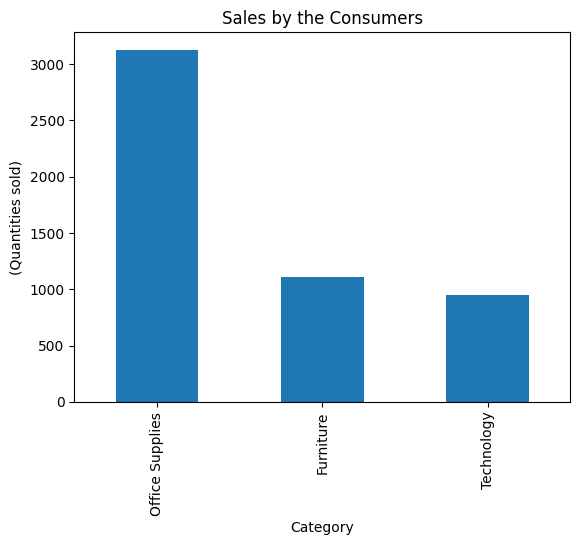

In [25]:
#sales of category items under Consumer segment
plt.xlabel("(Category)")
plt.ylabel("(Quantities sold)")
consumer_mod['Category'].value_counts().plot(kind='bar')
plt.title("Sales by the Consumers")
plt.show()

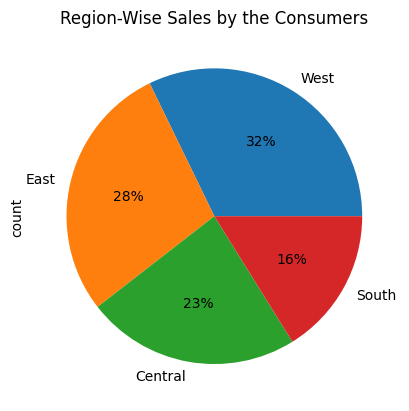

In [26]:
#distirbution of sales pattern about the region by the Corporate category
consumer_mod['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Consumers")
plt.show()

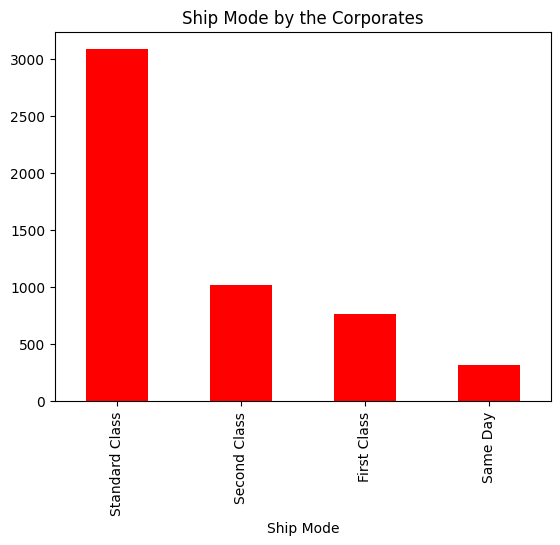

In [27]:
#Shipping mode of items ordered by Consumer segment
consumer_mod['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Corporates")
plt.show()

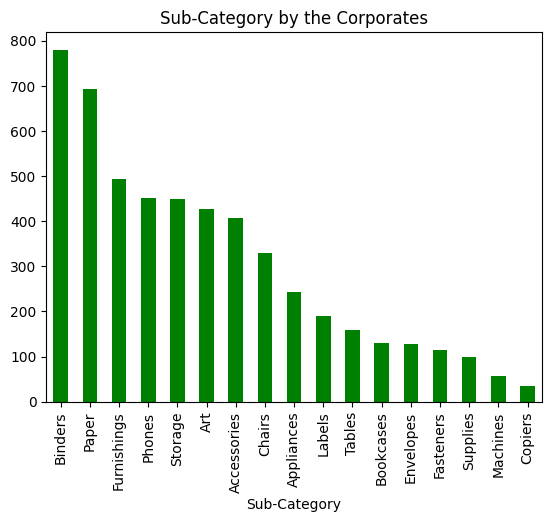

In [28]:
#sub-category items ordered by the Corporate segment
consumer_mod['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Corporates")
plt.show()

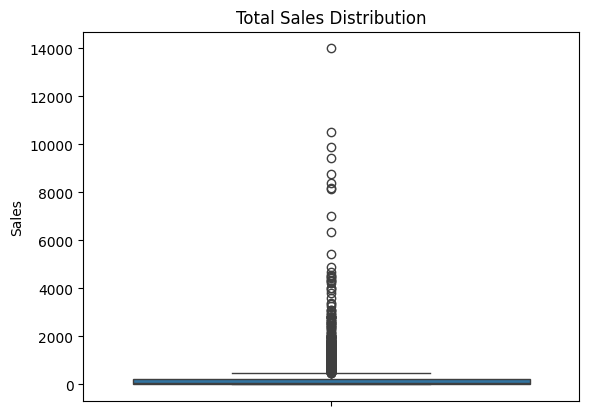

In [30]:
#sales pattern distribution
sns.boxplot(consumer_mod['Sales'])
plt.title("Total Sales Distribution")
plt.show()

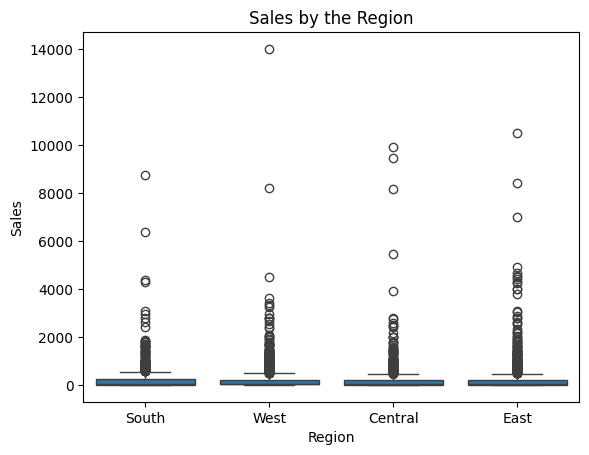

In [31]:
#sales distribution pattern region-wise
sns.boxplot(x=consumer_mod['Region'],y=consumer_mod['Sales'])
plt.title("Sales by the Region")
plt.show()

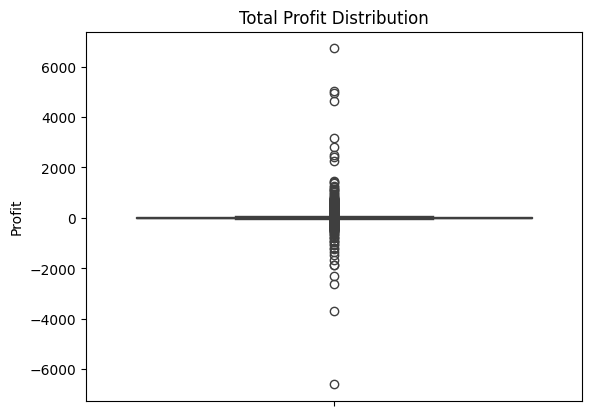

In [32]:
#profit pattern distribution
sns.boxplot(consumer_mod['Profit'])
plt.title("Total Profit Distribution")
plt.show()

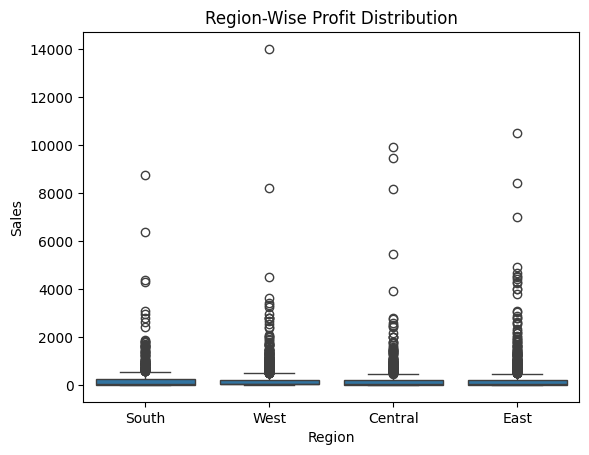

In [33]:
#profit pattern distribution
sns.boxplot(y=consumer_mod['Sales'],x=consumer_mod['Region'])
plt.title("Region-Wise Profit Distribution")
plt.show()

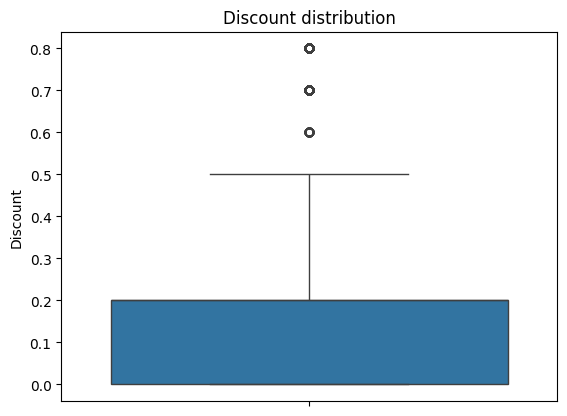

In [34]:
#discount pattern distribution
sns.boxplot(consumer_mod['Discount'])
plt.title("Discount distribution")
plt.show()

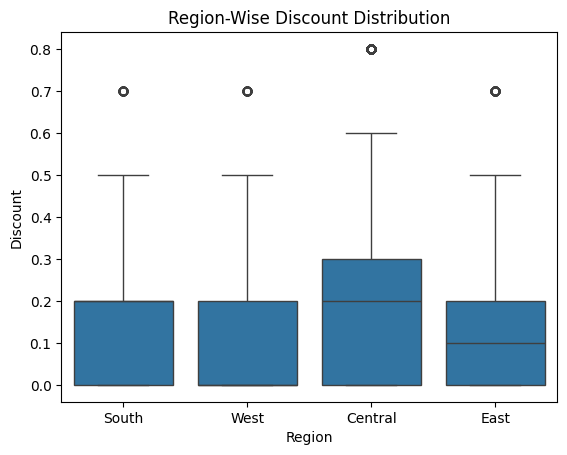

In [36]:
#discount pattern distribution
sns.boxplot(y=consumer_mod['Discount'],x=consumer_mod['Region'])
plt.title("Region-Wise Discount Distribution")
plt.show()

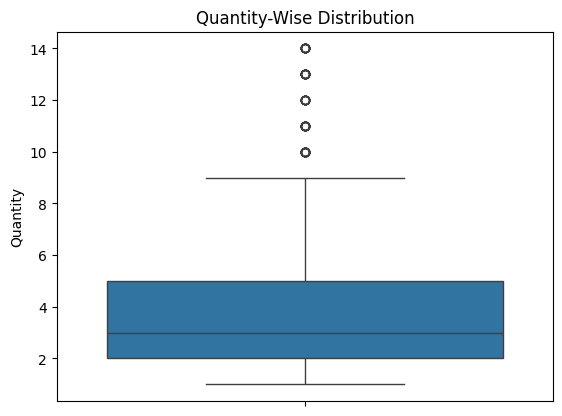

In [37]:
#quantity pattern distribution
sns.boxplot(consumer_mod['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

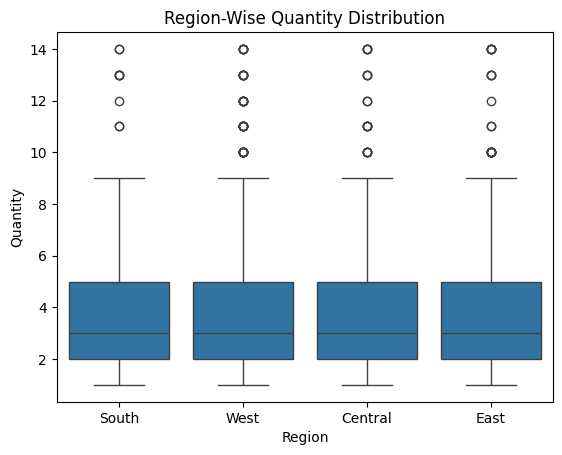

In [39]:
#quantity pattern distribution
sns.boxplot(y=consumer_mod['Quantity'],x=consumer_mod['Region'])
plt.title("Region-Wise Quantity Distribution")
plt.show()